In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/it/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/it/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/it/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/it/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: P

In [2]:
feat_cols = [tf.feature_column.numeric_column("x", shape=[1])]

In [3]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_global_id_in_cluster': 0, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_experimental_distribute': None, '_model_dir': '/tmp/tmp_zqmatae', '_train_distribute': None, '_num_ps_replicas': 0, '_device_fn': None, '_eval_distribute': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff2c17acdd8>, '_service': None, '_tf_random_seed': None, '_save_summary_steps': 100, '_master': '', '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_task_type': 'worker', '_evaluation_master': '', '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_protocol': None, '_task_id': 0, '_keep_checkpoint_every_n_hours': 10000, '_is_chief': True}


In [5]:
!pip install scikit-learn

  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 7.0MB 6.0MB/s eta 0:00:01
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 26.0MB 1.5MB/s ta 0:00:011    54% |█████████████████▎              | 14.1MB 9.3MB/s eta 0:00:02    55% |██████████████████              | 14.5MB 9.2MB/s eta 0:00:02    91% |█████████████████████████████▏  | 23.7MB 5.2MB/s eta 0:00:01
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 296kB 7.5MB/s ta 0:00:01
You are using pip version 10.0.1, however version 20.3.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
from sklearn.model_selection import train_test_split



In [7]:
X_data = np.linspace(0.0, 10.0, 1000000)
noise = np.random.randn(len(X_data))
y_true = (0.5 * X_data) + 5 + noise
X_df = pd.DataFrame(data=X_data, columns=["X Data"])
y_df = pd.DataFrame(data=y_true, columns=["Y"])
my_data = pd.concat([X_df, y_df], axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_true, test_size=0.3, random_state=101)

In [16]:
print(X_train.shape)

(700000,)


In [22]:
input_function = tf.estimator.inputs.numpy_input_fn({'x': X_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)

In [23]:
train_input_function = tf.estimator.inputs.numpy_input_fn({'x': X_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False)

In [24]:
test_input_function = tf.estimator.inputs.numpy_input_fn({'x': X_test}, y_test, batch_size=8, num_epochs=1000, shuffle=False)

In [25]:
estimator.train(input_fn=input_function, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp_zqmatae/model.ckpt.
INFO:tensorflow:loss = 590.3374, step = 1
INFO:tensorflow:global_step/sec: 300.655
INFO:tensorflow:loss = 35.565125, step = 101 (0.334 sec)
INFO:tensorflow:global_step/sec: 352.018
INFO:tensorflow:loss = 38.806717, step = 201 (0.297 sec)
INFO:tensorflow:global_step/sec: 161.97
INFO:tensorflow:loss = 10.881401, step = 301 (0.616 sec)
INFO:tensorflow:global_step/sec: 141.853
INFO:tensorflow:loss = 3.050373, step = 401 (0.709 sec)
INFO:tensorflow:global_step/sec: 254.256
INFO:tensorflow:loss = 11.928663, step = 501 (0.379 sec)
INFO:tensorflow:global_step/sec: 330.197
INFO:tensorflow:loss = 3.4191802, 

In [26]:
trian_metrics = estimator.evaluate(input_fn=train_input_function, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2024-05-23-14:04:13
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp_zqmatae/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2024-05-23-14:04:17
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1133864, global_step = 1000, label/mean = 7.4965134, loss = 8.907091, prediction/mean = 7.2935424
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100

In [27]:
eval_metrics = estimator.evaluate(input_fn=test_input_function, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2024-05-23-14:04:43
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp_zqmatae/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2024-05-23-14:04:48
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.140843, global_step = 1000, label/mean = 7.4893928, loss = 9.126744, prediction/mean = 7.272119
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000:

In [28]:
print("train metrics: {}".format(trian_metrics))
print("eval metrics: {}".format(eval_metrics))

train metrics: {'loss': 8.907091, 'average_loss': 1.1133864, 'prediction/mean': 7.2935424, 'global_step': 1000, 'label/mean': 7.4965134}
eval metrics: {'loss': 9.126744, 'average_loss': 1.140843, 'prediction/mean': 7.272119, 'global_step': 1000, 'label/mean': 7.4893928}


In [29]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': np.linspace(0, 10, 10)}, shuffle=False)

In [32]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp_zqmatae/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.32785], dtype=float32)},
 {'predictions': array([4.986597], dtype=float32)},
 {'predictions': array([5.645344], dtype=float32)},
 {'predictions': array([6.3040905], dtype=float32)},
 {'predictions': array([6.962838], dtype=float32)},
 {'predictions': array([7.6215844], dtype=float32)},
 {'predictions': array([8.280332], dtype=float32)},
 {'predictions': array([8.939078], dtype=float32)},
 {'predictions': array([9.597826], dtype=float32)},
 {'predictions': array([10.256573], dtype=float32)}]

In [33]:
predictions = []
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])
    

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp_zqmatae/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [34]:
predictions

[array([4.32785], dtype=float32),
 array([4.986597], dtype=float32),
 array([5.645344], dtype=float32),
 array([6.3040905], dtype=float32),
 array([6.962838], dtype=float32),
 array([7.6215844], dtype=float32),
 array([8.280332], dtype=float32),
 array([8.939078], dtype=float32),
 array([9.597826], dtype=float32),
 array([10.256573], dtype=float32)]

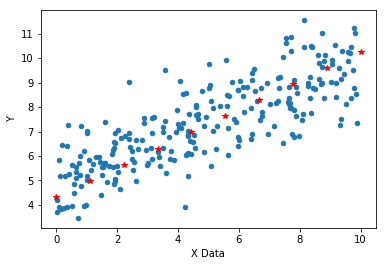

In [36]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(np.linspace(0, 10, 10), predictions, 'r*')